In [1]:
import sys
!{sys.executable} -m pip install xgboost

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [3]:
import pandas as pd
df= pd.read_csv("E:/mop/MOP-Code/Playground/dip/Dataset/merged_traffic_datav1.csv", usecols=['date','vehicle_class_1','vehicle_class_2','vehicle_class_3','vehicle_class_4','vehicle_class_5','vehicle_class_6','vehicle_class_7','vehicle_class_8','vehicle_class_9','vehicle_class_10','vehicle_class_11','vehicle_class_12','vehicle_class_13','motorcycle','bike','street_id'])
df = df.set_index('date', drop = False)
df.index = pd.to_datetime(df.index, format= 'mixed', dayfirst=True)
##df = df.sort_values(by = ['date'])

In [4]:
df.tail()

,date,vehicle_class_1,vehicle_class_2,vehicle_class_3,vehicle_class_4,vehicle_class_5,vehicle_class_6,vehicle_class_7,vehicle_class_8,vehicle_class_9,vehicle_class_10,vehicle_class_11,vehicle_class_12,vehicle_class_13,motorcycle,bike,street_id
date,,,,,,,,,,,,,,,,,
2014-11-26,26/11/2014,877.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,720
2014-11-20,20/11/2014,292.4,212.5,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,720
2014-11-20,20/11/2014,146.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,720
2014-11-21,21/11/2014,146.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,720
2014-11-21,21/11/2014,146.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,720


In [5]:
df['total_emission']= df['vehicle_class_1'] + df['vehicle_class_2'] + df['vehicle_class_3'] + df['vehicle_class_4']+ df['vehicle_class_5']+df['vehicle_class_6']+df['vehicle_class_7']+df['vehicle_class_8']+df['vehicle_class_9']+df['vehicle_class_10']+df['vehicle_class_11']+df['vehicle_class_12']+df['vehicle_class_13']+df['motorcycle']+df['bike']



In [6]:
df = df[df['total_emission'] > 0]

In [7]:
df = df[['date', 'total_emission']]

In [8]:
df

,date,total_emission
date,,
2014-10-11,11/10/2014,3508.8
2014-10-11,11/10/2014,6140.4
2014-10-11,11/10/2014,5060.3
2014-11-11,11/11/2014,438.6
2014-11-11,11/11/2014,146.2
...,...,...
2014-11-26,26/11/2014,877.2
2014-11-20,20/11/2014,504.9
2014-11-20,20/11/2014,146.2


In [9]:
##df = df.set_index('date')

<Axes: xlabel='date'>

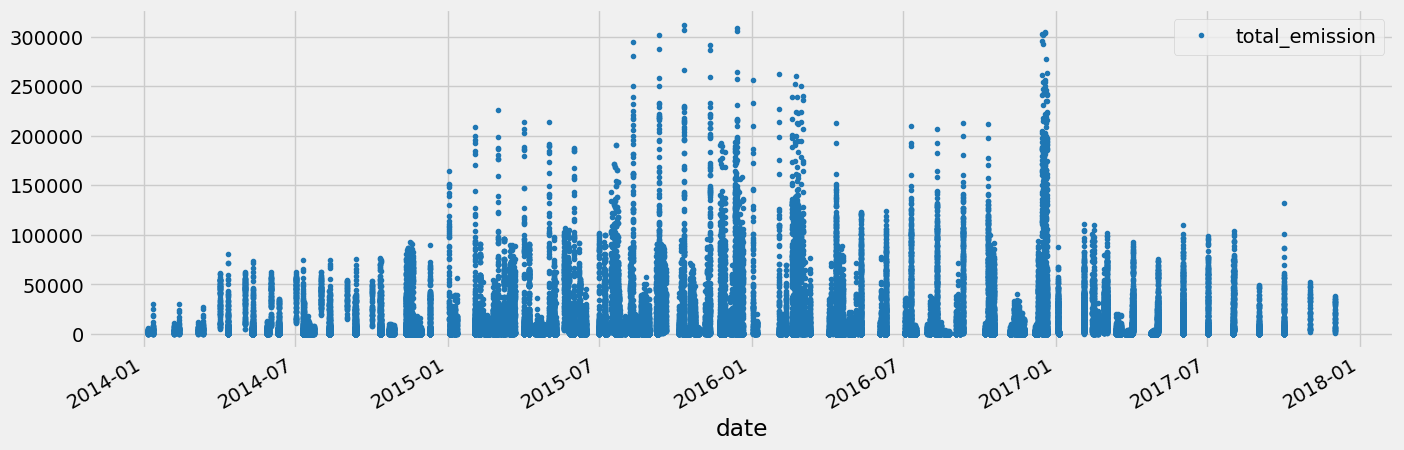

In [10]:
df.plot(style= '.', figsize=(15, 5), color= color_pal[0])

In [11]:
##df.index = pd.to_datetime(df.index, format= 'mixed', dayfirst=True)

In [12]:
##df.plot(style= '.', figsize=(15, 5), color= color_pal[0])

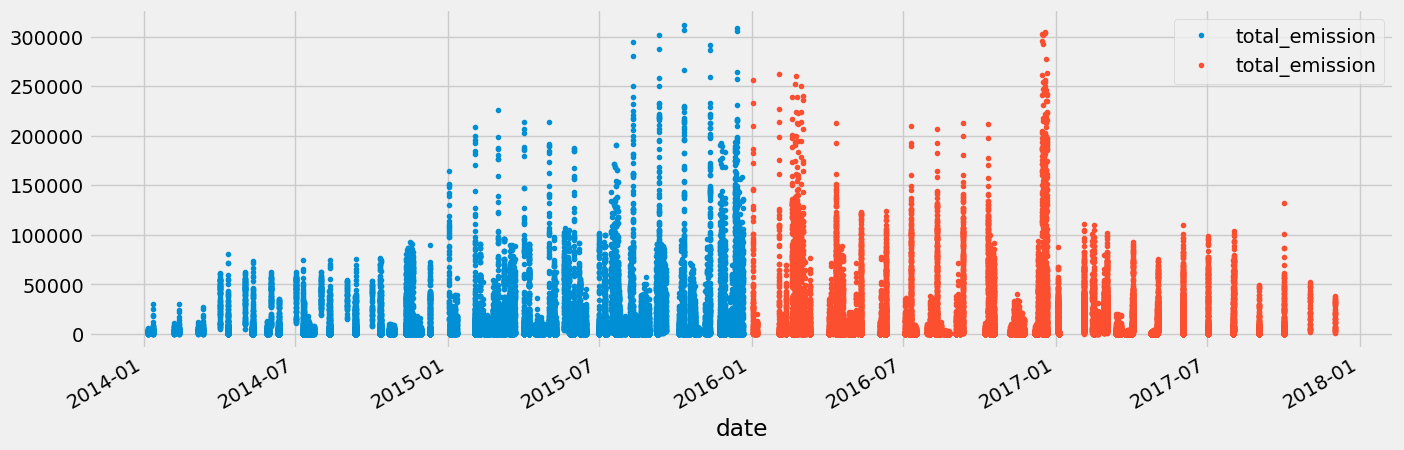

In [13]:
train = df.loc[df.index < '2016-01-01']
test = df.loc[df.index >= '2016-01-01']
fig, ax = plt.subplots( figsize=(15, 5))
train.plot(ax=ax, label='training set', style = '.')
test.plot(ax=ax, label='testing set', style = '.')
plt.show()


In [14]:
##df.loc[(df.index > '05-05-2014') & (df.index < '06-06-2014')].plot()

In [15]:
def create_features(df):
    df = df.copy()
    df['day']= df.index.day
    df['month']= df.index.month
    df['year']= df.index.year
    return df
df = create_features(df)

<Axes: xlabel='year', ylabel='total_emission'>

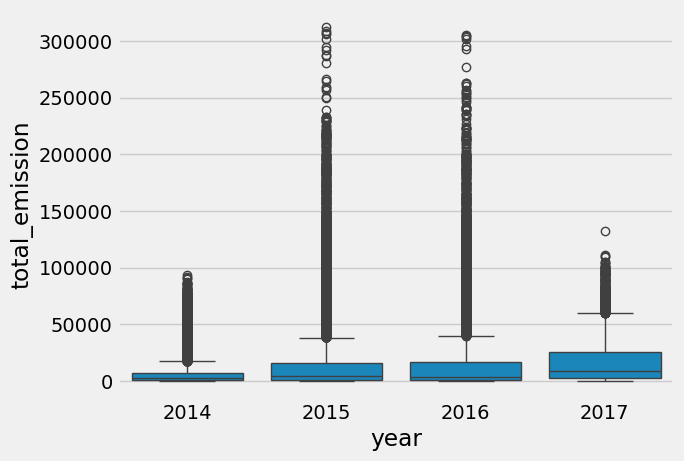

In [16]:
sns.boxplot(data=df, x='year', y= "total_emission")

<Axes: xlabel='month', ylabel='total_emission'>

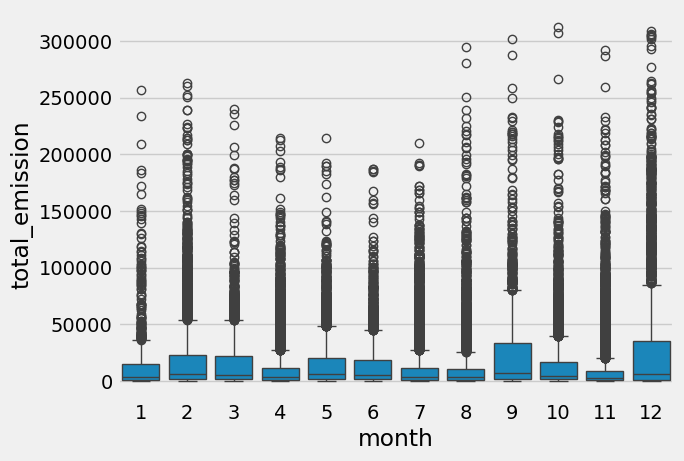

In [17]:
sns.boxplot(data=df, x='month', y= "total_emission")


In [18]:
train = create_features(train)
test = create_features(test)

In [19]:
FEATURES = ['day', 'month', 'year']
TARGET = 'total_emission'

In [20]:
x_train= train[FEATURES]
y_train = train[TARGET]

x_test= test[FEATURES]
y_test = test[TARGET]

In [21]:
reg = xgb.XGBRegressor(n_estimators= 1000, early_stopping_rounds=50, learning_rate= 0.01) 
reg.fit(x_train, y_train,
       eval_set= [(x_train, y_train), (x_test, y_test)],
      )

[0]	validation_0-rmse:25756.86505	validation_1-rmse:30333.40112
[1]	validation_0-rmse:25713.13536	validation_1-rmse:30338.32464
[2]	validation_0-rmse:25670.20116	validation_1-rmse:30343.36272
[3]	validation_0-rmse:25628.04960	validation_1-rmse:30348.51153
[4]	validation_0-rmse:25586.66690	validation_1-rmse:30353.76617
[5]	validation_0-rmse:25546.04113	validation_1-rmse:30359.18247
[6]	validation_0-rmse:25506.15787	validation_1-rmse:30364.69510
[7]	validation_0-rmse:25467.00603	validation_1-rmse:30370.94397
[8]	validation_0-rmse:25428.57009	validation_1-rmse:30376.63509
[9]	validation_0-rmse:25390.84046	validation_1-rmse:30383.05400
[10]	validation_0-rmse:25353.80330	validation_1-rmse:30388.90696
[11]	validation_0-rmse:25317.44763	validation_1-rmse:30395.48153
[12]	validation_0-rmse:25280.11473	validation_1-rmse:30397.84355
[13]	validation_0-rmse:25243.46852	validation_1-rmse:30400.32496
[14]	validation_0-rmse:25207.49876	validation_1-rmse:30402.92176
[15]	validation_0-rmse:25172.19203	

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

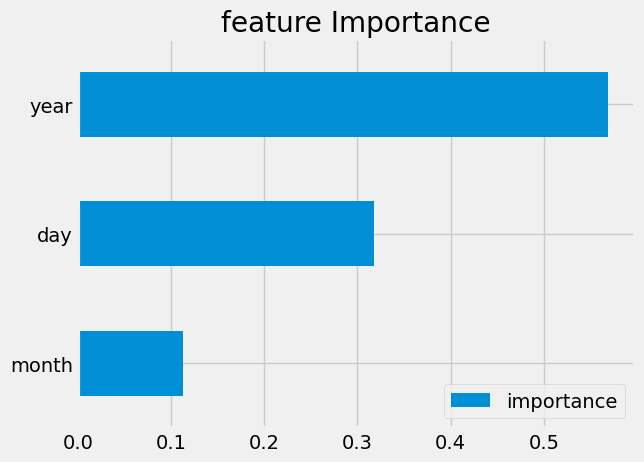

In [22]:
t = pd.DataFrame(data = reg.feature_importances_, index=reg.feature_names_in_, columns= ['importance'])
t.sort_values('importance').plot(kind='barh', title = 'feature Importance')
plt.show()

In [23]:
test['prediction']= reg.predict(x_test)
df = df.merge(test[['prediction']], how = 'left', left_index= True, right_index= True)

In [24]:
df

,date,total_emission,day,month,year,prediction
date,,,,,,
2014-10-11,11/10/2014,3508.8,11,10,2014,NaN
2014-10-11,11/10/2014,6140.4,11,10,2014,NaN
2014-10-11,11/10/2014,5060.3,11,10,2014,NaN
2014-11-11,11/11/2014,438.6,11,11,2014,NaN
2014-11-11,11/11/2014,146.2,11,11,2014,NaN
...,...,...,...,...,...,...
2014-11-26,26/11/2014,877.2,26,11,2014,NaN
2014-11-20,20/11/2014,504.9,20,11,2014,NaN
2014-11-20,20/11/2014,146.2,20,11,2014,NaN


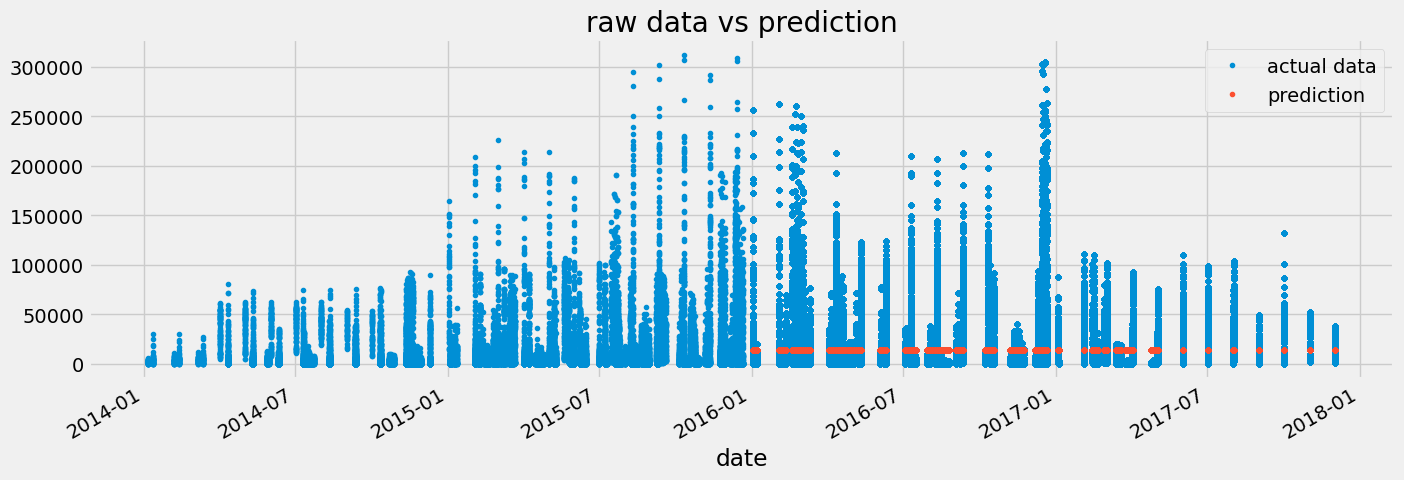

In [25]:
ax = df[['total_emission']].plot(style= '.', figsize=(15,5))
df['prediction'].plot(ax=ax, style= '.')
plt.legend(['actual data', 'prediction'])
ax.set_title('raw data vs prediction')
plt.show()
